# Week 4 Project

Using the Craigslist Vehicles Dataset available on Kaggle (https://www.kaggle.com/datasets/mbaabuharun/craigslist-vehicles), we'd like you to create a Time-Series Model following the approach outlined below. <br> <br>
Here are the key steps:
- Start by addressing missing values in the dataset. You can handle this by filling in missing values with the median for numerical columns and the mode for categorical columns.
- Ensure that the data types of the columns are appropriate. Specifically, make sure to convert the 'posting_date' column to a datetime data type.
- Utilize the 'posting_date' column to create a datetime index for the dataset. This will facilitate the analysis of temporal patterns.
- With clean data, explore it using various visualizations and statistical analysis techniques. This step is crucial for understanding temporal patterns, identifying seasonal trends, and analyzing demand-supply dynamics by region and vehicle type.
Build the time-series chart.
- Finally, create a GitHub Repository and push your work there, also document your process through each of the steps and demonstrate your understanding by implementing them on the dataset.

## Data Preparation

#### Importing libraries

In [100]:
import pandas as pd
pd.set_option('display.max_columns', None) # display all columns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings(action='ignore')

#### Loading Data

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
url = ('/content/drive/My Drive/Datasets/craigslist_vehicles.csv')
df = pd.read_csv(url, index_col=0)
df.reset_index(drop=True, inplace=True)

df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date,removal_date
0,7307679724,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,NaN,gas,184000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00
1,7311833696,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,NaN,gas,184000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00
2,7311441996,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4900,2006.0,toyota,camry,excellent,4 cylinders,gas,184930.0,clean,automatic,NaN,fwd,NaN,sedan,silver,https://images.craigslist.org/00808_5FkOw2aGjA...,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,NaN,tx,32.453848,-99.787900,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00
3,7307680715,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,NaN,gas,206000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-04-26 00:00:00+00:00
4,7311834578,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,NaN,gas,206000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-05-12 00:00:00+00:00


#### Exploring Data

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [104]:
df.nunique()

id              426880
url             426880
region             404
region_url         413
price            15655
year               114
manufacturer        42
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118264
drive                3
size                 4
type                13
paint_color         12
image_url       241899
description     360911
county               0
state               51
lat              53181
long             53772
posting_date        32
removal_date        88
dtype: int64

In [105]:
df.duplicated().sum()

0

In [106]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


#### Checking for missing values

In [107]:
# checking for missing values
missing_val = pd.concat([df.isnull().sum(), (df.isnull().mean() * 100).round(2)], axis=1, keys=['Total', 'Percentage of Missing Values (%)'])
missing_val = missing_val[missing_val['Total'] > 0].sort_values(by='Total', ascending=False)
print('Checking for null values in the dataset')
missing_val

Checking for null values in the dataset


,Total,Percentage of Missing Values (%)
county,426880,100.00
size,306361,71.77
cylinders,177678,41.62
condition,174104,40.79
VIN,161042,37.73
drive,130567,30.59
paint_color,130203,30.50
type,92858,21.75
manufacturer,17646,4.13
title_status,8242,1.93


In [108]:
# county column has 100% null values, so we drop it off completely
df = df.drop(['county'], axis=1)

#### Imputing missing values for both numerical and categorical columns in dataset

In [109]:
numerical_columns = df.select_dtypes(include=np.number).columns
print(numerical_columns);print()

categorical_columns = df.select_dtypes(exclude=np.number).columns
print(categorical_columns)

Index(['id', 'price', 'year', 'odometer', 'lat', 'long'], dtype='object')

Index(['url', 'region', 'region_url', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive',
       'size', 'type', 'paint_color', 'image_url', 'description', 'state',
       'posting_date', 'removal_date'],
      dtype='object')


In [110]:
# Create a SimpleImputer object for numerical & categorical values
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

In [111]:
# check if null values remain
df.isnull().sum().any()

False

#### Correcting Datatypes

In [112]:
df.dtypes

id              float64
url              object
region           object
region_url       object
price           float64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
state            object
lat             float64
long            float64
posting_date     object
removal_date     object
dtype: object

In [113]:
# correct data types
df['year'] = df['year'].astype('int')
df['posting_date'] = pd.to_datetime(df['posting_date'], format='%Y-%m-%d')
df['removal_date'] = pd.to_datetime(df['removal_date'], format='%Y-%m-%d')

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   id            426880 non-null  float64            
 1   url           426880 non-null  object             
 2   region        426880 non-null  object             
 3   region_url    426880 non-null  object             
 4   price         426880 non-null  float64            
 5   year          426880 non-null  int64              
 6   manufacturer  426880 non-null  object             
 7   model         426880 non-null  object             
 8   condition     426880 non-null  object             
 9   cylinders     426880 non-null  object             
 10  fuel          426880 non-null  object             
 11  odometer      426880 non-null  float64            
 12  title_status  426880 non-null  object             
 13  transmission  426880 non-null  object       

In [115]:
df.describe()

,id,price,year,odometer,lat,long
count,4.268800e+05,4.268800e+05,426880.000000,4.268800e+05,426880.000000,426880.000000
mean,7.311487e+09,7.519903e+04,2011.234527,9.804333e+04,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.438778,2.127764e+05,5.796551,18.224040
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.813000e+04,34.757016,-111.907973
50%,7.312621e+09,1.395000e+04,2013.000000,8.660000e+04,39.064410,-89.028197
75%,7.315254e+09,2.648575e+04,2017.000000,1.330000e+05,42.350000,-81.030000
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,82.390818,173.885502


In [116]:
print(df.columns.tolist())

['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'image_url', 'description', 'state', 'lat', 'long', 'posting_date', 'removal_date']


#### Remove Redundant Columns

In [117]:
df.head(3)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date,removal_date
0,7.307680e+09,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500.0,2002,bmw,x5,good,6 cylinders,gas,184000.0,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00
1,7.311834e+09,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500.0,2002,bmw,x5,good,6 cylinders,gas,184000.0,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00
2,7.311442e+09,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4900.0,2006,toyota,camry,excellent,4 cylinders,gas,184930.0,clean,automatic,1FMJU1JT1HEA52352,fwd,full-size,sedan,silver,https://images.craigslist.org/00808_5FkOw2aGjA...,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,tx,32.453848,-99.787900,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00


In [118]:
columns_to_drop = ['id', 'url', 'region', 'region_url', 'model', 'VIN', 'image_url', 'description', 'posting_date', 'removal_date']
df = df.drop(columns_to_drop, axis=1)

In [119]:
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,4500.0,2002,bmw,good,6 cylinders,gas,184000.0,clean,automatic,4wd,full-size,sedan,white,tx,32.401556,-99.884713
1,4500.0,2002,bmw,good,6 cylinders,gas,184000.0,clean,automatic,4wd,full-size,sedan,white,tx,32.401556,-99.884713
2,4900.0,2006,toyota,excellent,4 cylinders,gas,184930.0,clean,automatic,fwd,full-size,sedan,silver,tx,32.453848,-99.787900
3,6500.0,2008,ford,good,6 cylinders,gas,206000.0,clean,automatic,4wd,full-size,sedan,white,tx,32.401556,-99.884713
4,6500.0,2008,ford,good,6 cylinders,gas,206000.0,clean,automatic,4wd,full-size,sedan,white,tx,32.401556,-99.884713


## Exploratory Data Analysis

#### Univariate Distributions

In [120]:
# Setting Custom colors
my_colors = ["#ff6e54", "#ffa600", "#ff2e63", "#a3f7bf", "#9378ff", "#56e39f", "#ff67ab", "#5e2ca5", "#ffd166", "#00b4d8", "#4ecdc4", "#f8edeb"]

# Create a seaborn palette object
my_palette = sns.color_palette(my_colors)

# Use the custom palette with a seaborn function
sns.set_palette(my_palette)

from matplotlib.colors import ListedColormap
colors = ['#ffc3a0', '#ffafcc', '#bde0fe', '#ffabab']
my_cmap = sns.color_palette(colors)
cmap = ListedColormap(colors)

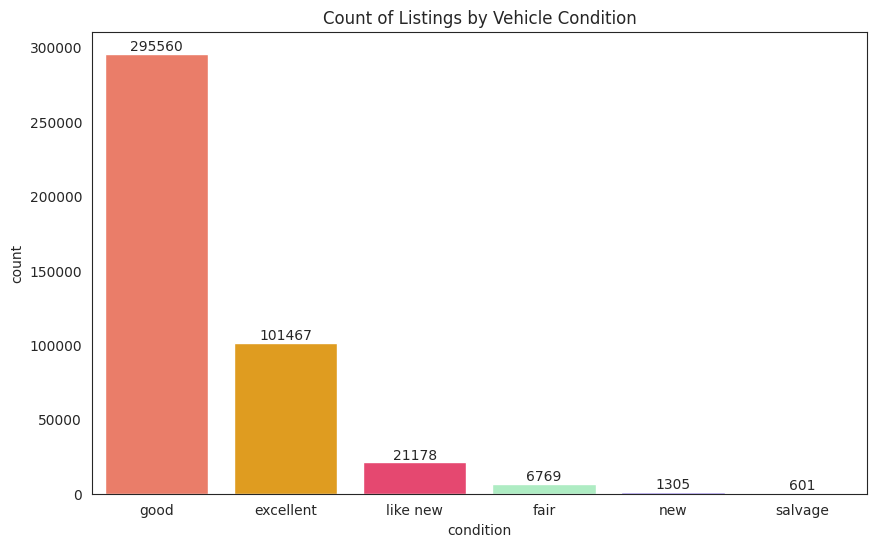

In [121]:
# Distribution of condition
plt.figure(figsize=[10,6])
ax = sns.countplot(data=df, x='condition')
ax.set_title('Count of Listings by Vehicle Condition')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show();

The majority of listings are for vehicles in good condition, followed by excellent and like new condition. There are very few listings for vehicles in fair, new, or salvage condition.

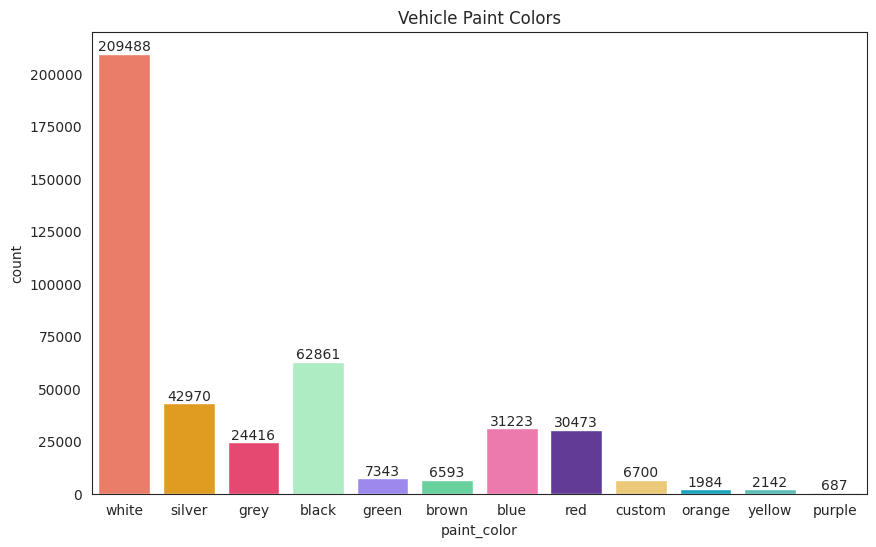

In [122]:
# Distribution of paint color
plt.figure(figsize=[10,6])
ax = sns.countplot(data=df, x='paint_color')
ax.set_title('Vehicle Paint Colors')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show();

The majority of vehicle paint colors are white with purple being the least.

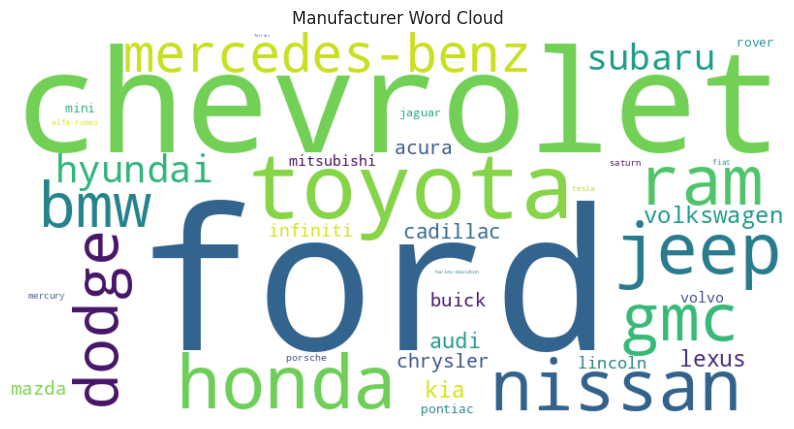

In [123]:
# top Vehicle Manufacturers
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(df['manufacturer'].value_counts())
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Manufacturer Word Cloud')
plt.show()

In this wordcloud, it can be seen that the size of the word is proportional to the frequency of the word in the data set. From this, we can see that Toyota, Chevrolet, and Ford are the most popular car manufacturers.

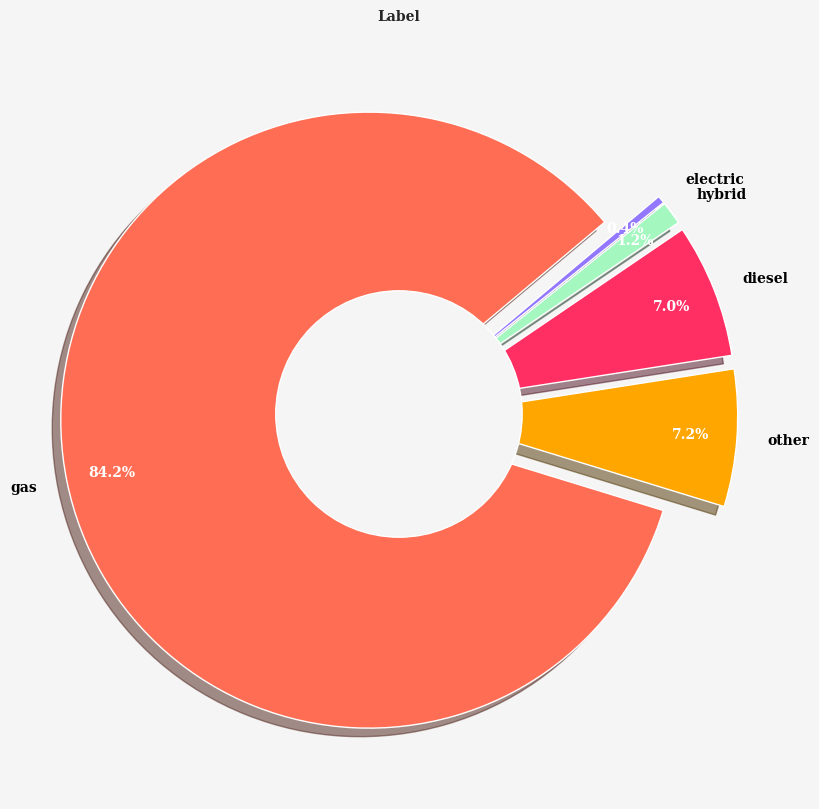

In [124]:
label_data = df['fuel'].value_counts()
explode = [0.1] * len(df['fuel'].value_counts())
plt.figure(figsize=(15, 10), facecolor='#F5F5F5')
patches, texts, pcts = plt.pie(label_data,
                               labels=label_data.index,
                               pctdistance=0.85,
                               shadow=True,
                               startangle=40,
                               explode=explode,
                               autopct='%1.1f%%',
                               textprops={'fontsize': 10,
                                          'color': 'black',
                                          'weight': 'bold',
                                          'family': 'serif'})
plt.setp(pcts, color='white')
hfont = {'fontname': 'serif', 'weight': 'bold'}
plt.title('Label', size=10, **hfont)
centre_circle = plt.Circle((0, 0), 0.40, fc='#F5F5F5')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

Most vehicles are gas-powered, which makes up 84% of the total.
The second most common fuel type is diesel and other which may include alternative fuels such as biodiesel, ethanol, hydrogen, or natural gas  which both makes up 14% of the total.

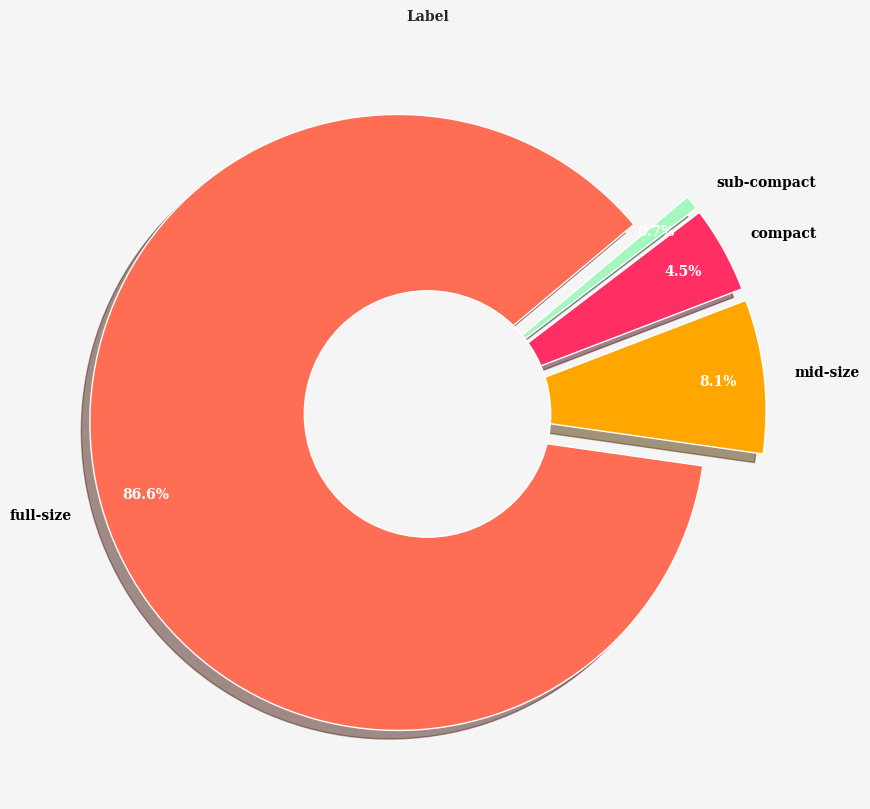

In [125]:
label_data = df['size'].value_counts()
explode = [0.1] * len(df['size'].value_counts())
plt.figure(figsize=(15, 10), facecolor='#F5F5F5')
patches, texts, pcts = plt.pie(label_data,
                               labels=label_data.index,
                               pctdistance=0.85,
                               shadow=True,
                               startangle=40,
                               explode=explode,
                               autopct='%1.1f%%',
                               textprops={'fontsize': 10,
                                          'color': 'black',
                                          'weight': 'bold',
                                          'family': 'serif'})
plt.setp(pcts, color='white')
hfont = {'fontname': 'serif', 'weight': 'bold'}
plt.title('Label', size=10, **hfont)
centre_circle = plt.Circle((0, 0), 0.40, fc='#F5F5F5')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

The visualization shows the distribution of vehicle sizes. The majority of vehicles are full-size (87%), followed by mid-size (8%), compact (5%), and sub-compact (1%).

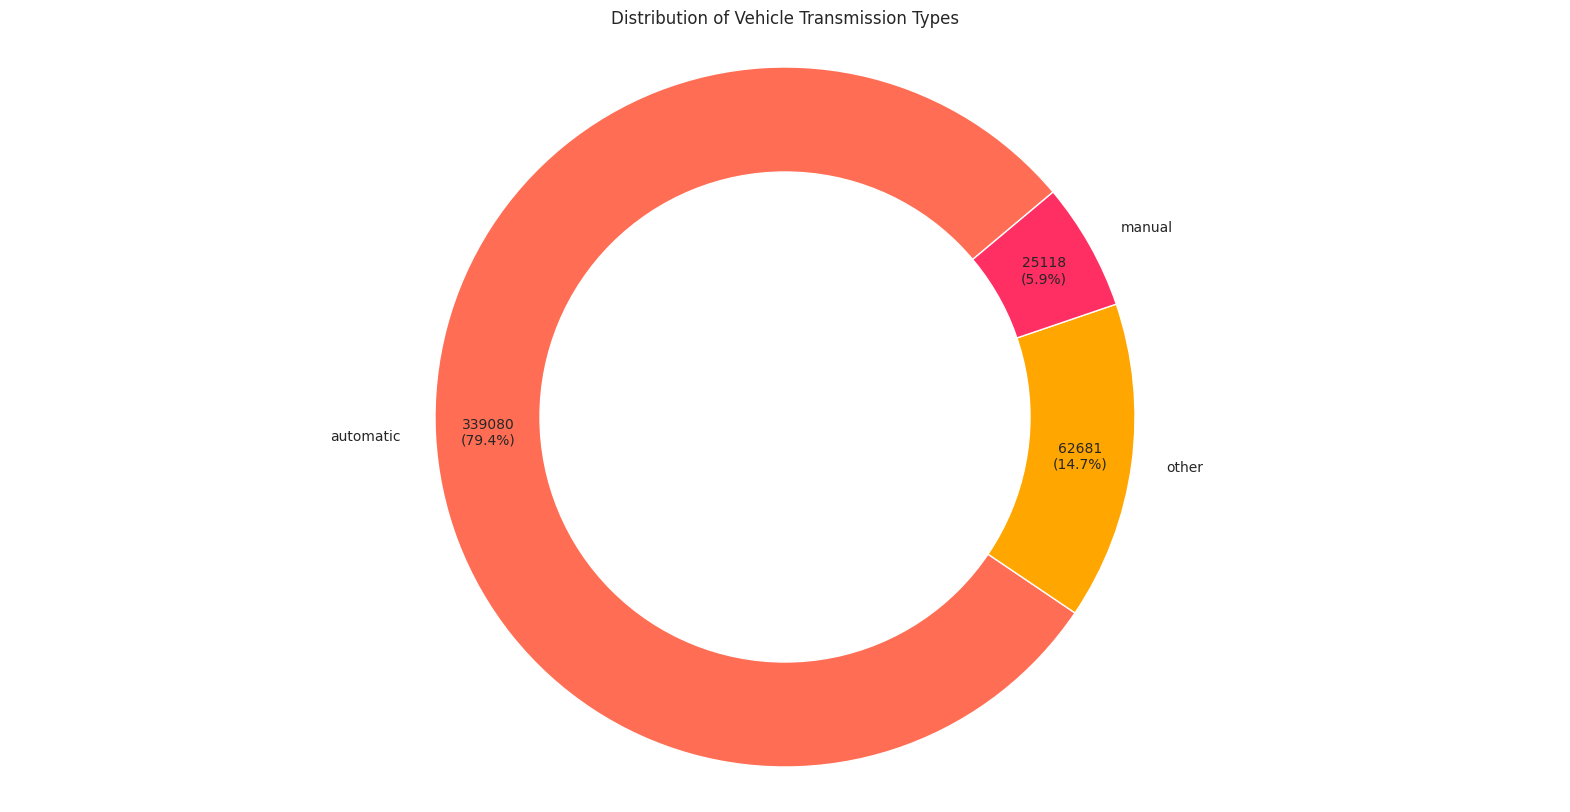

In [126]:
# Distribution of size
count_data = df['transmission'].value_counts()
total_count = len(df)

plt.figure(figsize=(20, 10))
plt.pie(count_data, labels=count_data.index, autopct=lambda p: f'{int(p * total_count / 100)}\n({p:.1f}%)', startangle=40, pctdistance=0.85,
        wedgeprops={'width': 0.4, 'edgecolor': 'w'})

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Vehicle Transmission Types')
plt.axis('equal')
plt.show();

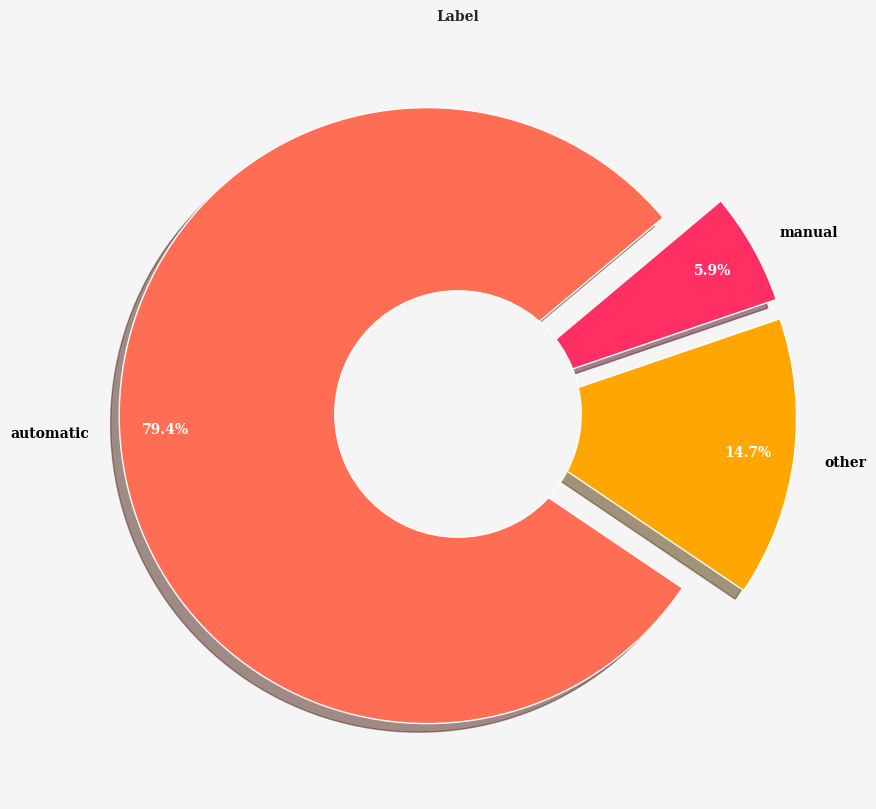

In [127]:
label_data = df['transmission'].value_counts()
explode = [0.1] * len(df['transmission'].value_counts())
plt.figure(figsize=(15, 10), facecolor='#F5F5F5')
patches, texts, pcts = plt.pie(label_data,
                               labels=label_data.index,
                               pctdistance=0.85,
                               shadow=True,
                               startangle=40,
                               explode=explode,
                               autopct='%1.1f%%',
                               textprops={'fontsize': 10,
                                          'color': 'black',
                                          'weight': 'bold',
                                          'family': 'serif'})
plt.setp(pcts, color='white')
hfont = {'fontname': 'serif', 'weight': 'bold'}
plt.title('Label', size=10, **hfont)
centre_circle = plt.Circle((0, 0), 0.40, fc='#F5F5F5')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

The majority of vehicles are automatic, with a smaller percentage being manual and other types.

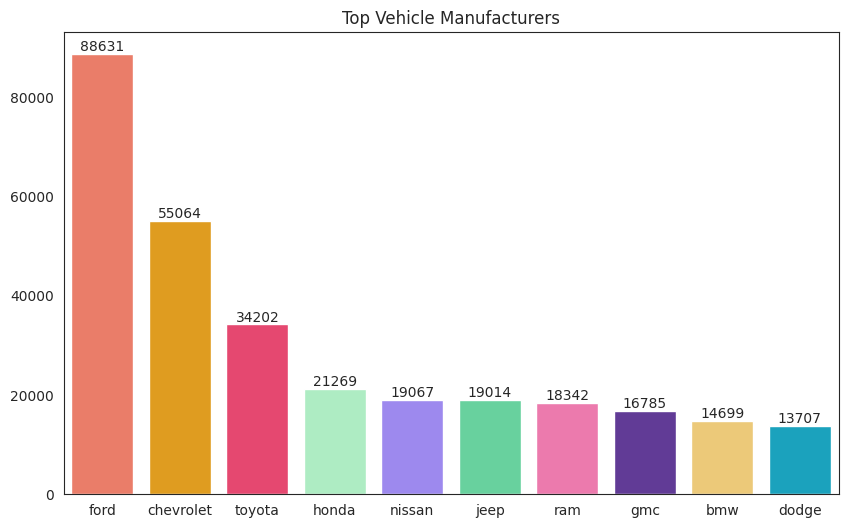

In [128]:
# Distribution of Top Manufacturers
plt.figure(figsize=[10,6])
top_manufacturers = df['manufacturer'].value_counts().head(10)
ax = sns.barplot(x=top_manufacturers.index, y=top_manufacturers.values)
ax.set_title('Top Vehicle Manufacturers')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show();

Ford, Chevrolet and Toyota are the most popular car manufacturers

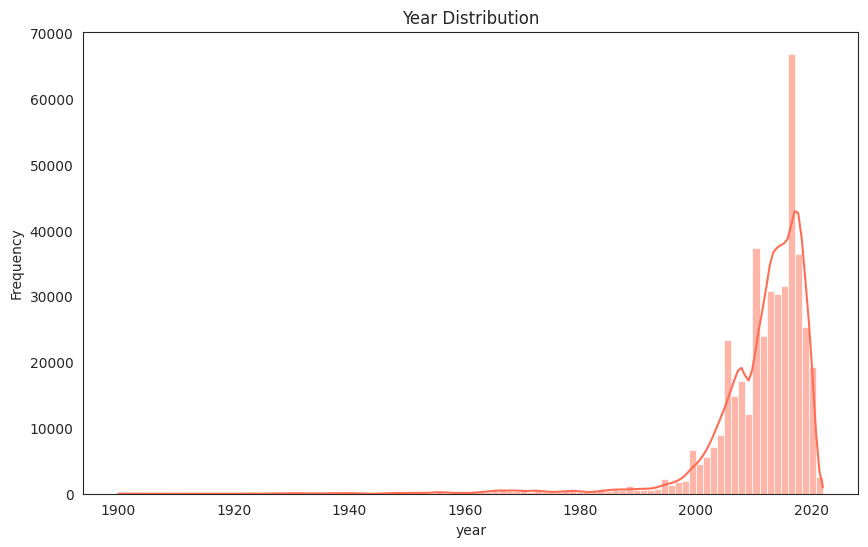

In [130]:
# Distribution of Years
plt.figure(figsize=(10, 6))
sns.histplot(df['year'], bins=100, kde=True)
plt.title('Year Distribution')
plt.ylabel('Frequency')
plt.show()

The visualization shows the frequency of years in the data. The frequency of years increases steadily from 1900 to 2020, with a sharp increase around 2000. This could suggest that the dataset contains more recent data.

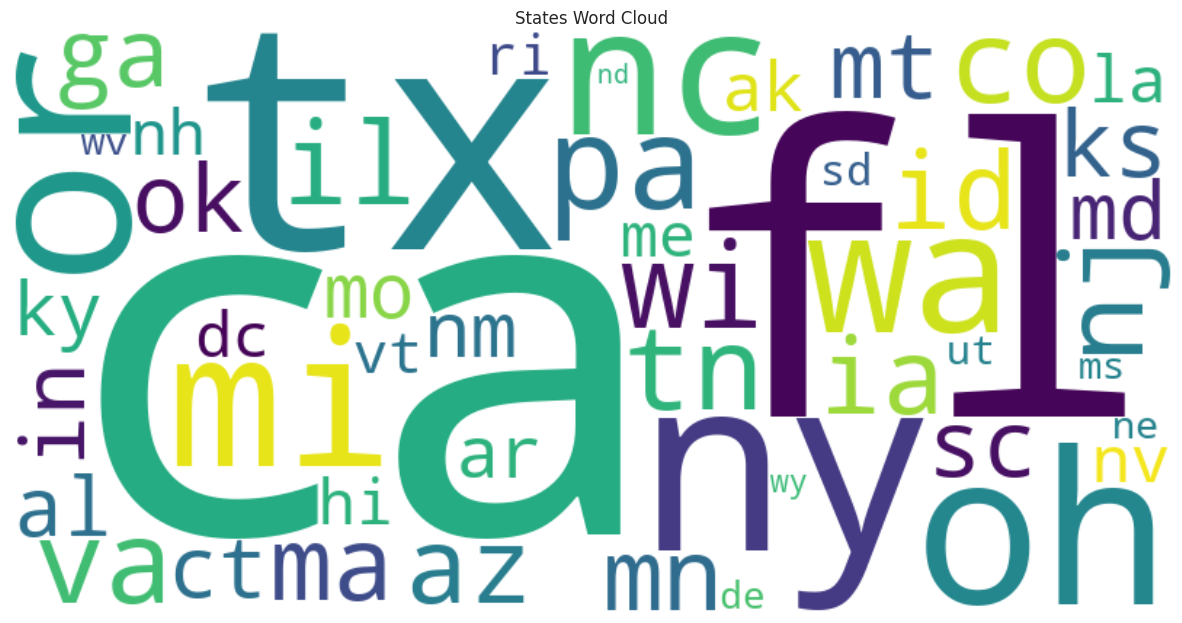

In [131]:
# STATE
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(df['state'].value_counts())
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('States Word Cloud')
plt.show()

In this wordcloud, it can be seen that the size of the word is proportional to the frequency of the word in the data set. From this, we can see that California, Florida, and Texas are the most popular states.

#### Bivariate & Multivariate Distributions

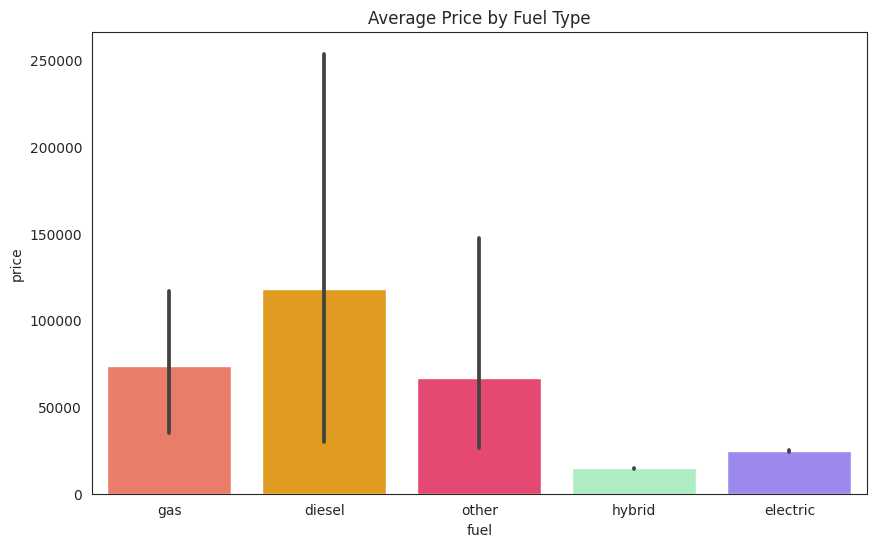

In [132]:
plt.figure(figsize=(10, 6))
sns.barplot(x='fuel', y='price', data=df, )
plt.title('Average Price by Fuel Type')
plt.show()

Diesel is the most expensive type of fuel, followed by other fuel, hybrid, and electric. Gas is the least expensive type of fuel. This information could be useful for someone who is looking to purchase a new car and is considering the cost of fuel.

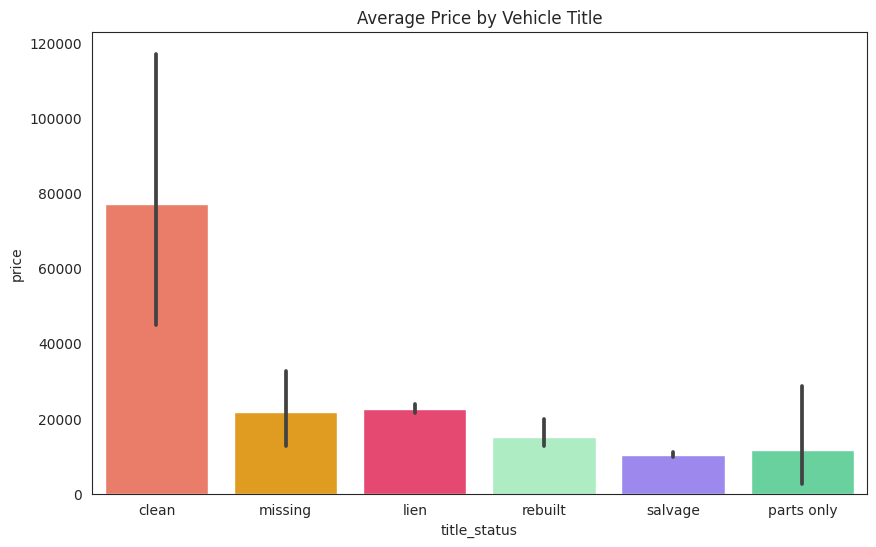

In [133]:
plt.figure(figsize=(10, 6))
sns.barplot(x='title_status', y='price', data=df, )
plt.title('Average Price by Vehicle Title')
plt.show()

Vehicles with a “clean” title status have a significantly higher average price than vehicles with other title statuses. This could be because vehicles with a clean title status are more likely to be in good condition and have a higher value.

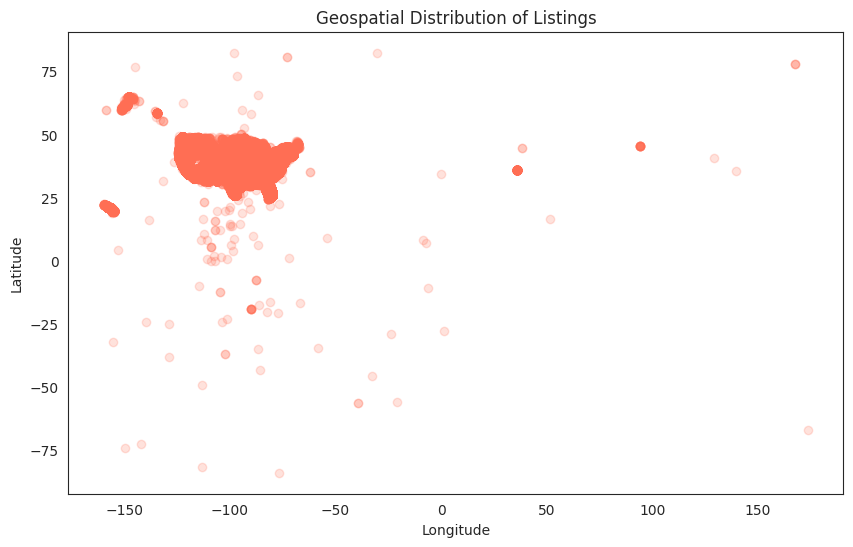

In [134]:
plt.figure(figsize=[10,6])
plt.scatter(df['long'], df['lat'], alpha=0.2)
plt.title('Geospatial Distribution of Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

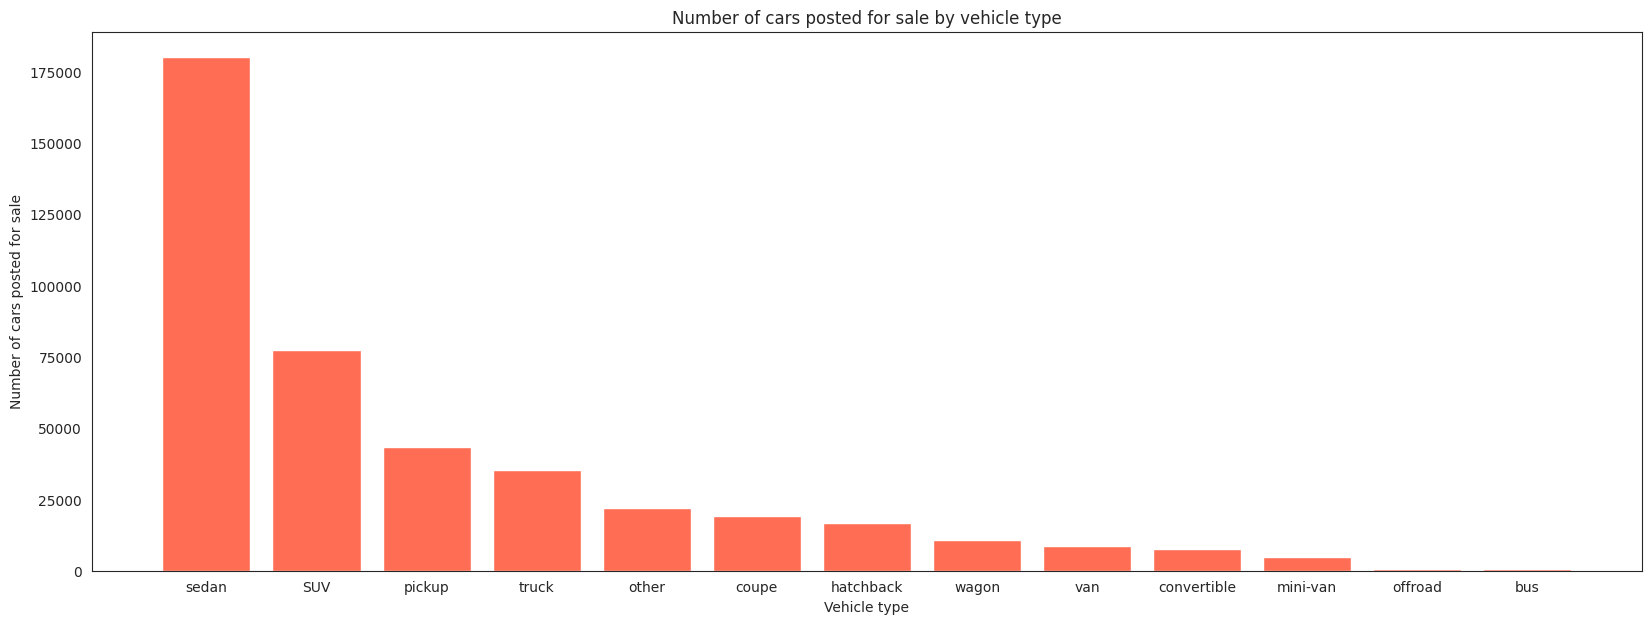

In [135]:
df_grouped = df.groupby('type')
n_cars_per_vehicle_type = df_grouped.size()

# Sort the vehicle types by the number of cars posted for sale
vehicle_types_sorted = n_cars_per_vehicle_type.sort_values(ascending=False).index

plt.figure(figsize=[20,7])
plt.bar(vehicle_types_sorted, n_cars_per_vehicle_type[vehicle_types_sorted])
plt.xlabel('Vehicle type')
plt.ylabel('Number of cars posted for sale')
plt.title('Number of cars posted for sale by vehicle type')
plt.show()

The highest number of cars posted for sale is for sedans, followed by SUVs and pickups. The lowest number of cars posted for sale is for buses and offroad vehicles.

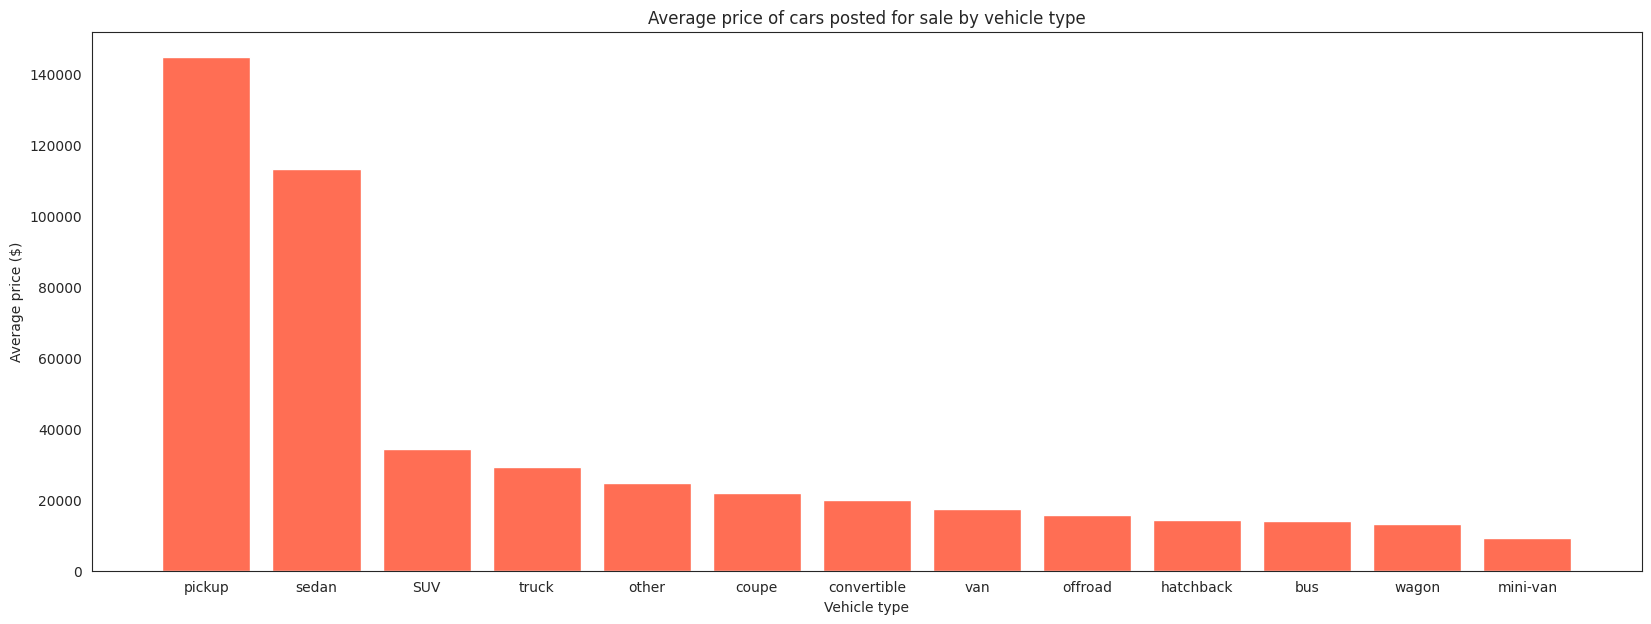

In [136]:
# the average price of cars posted for sale in each vehicle type
average_price_per_vehicle_type = df_grouped['price'].mean()

# Sort the vehicle types by the average price of cars posted for sale
vehicle_types_sorted = average_price_per_vehicle_type.sort_values(ascending=False).index

plt.figure(figsize=[20,7])
plt.bar(vehicle_types_sorted, average_price_per_vehicle_type[vehicle_types_sorted])
plt.xlabel('Vehicle type')
plt.ylabel('Average price ($)')
plt.title('Average price of cars posted for sale by vehicle type')
plt.show()

The average price of cars posted for sale by vehicle type is highest for pickup trucks and lowest for minivans. The highest average price is for pickup trucks at around 140,000 dollars, while the lowest average price is for minivans at around 20,000 dollars.

#### Time-Series Charts

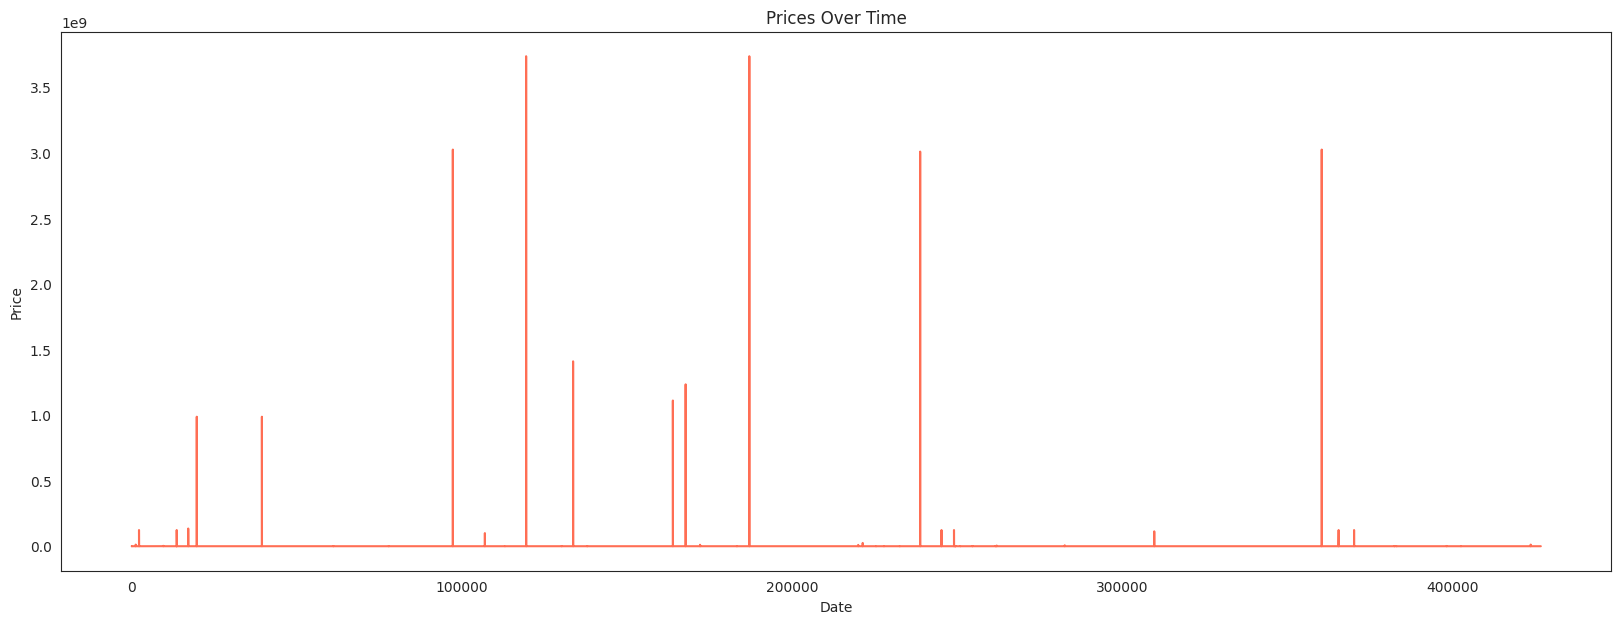

In [137]:
plt.figure(figsize=[20,7])
sns.lineplot(data=df, x=df.index, y='price', ci=None)
plt.title('Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

The visualization shows the fluctuation of prices over time. The prices have been fluctuating quite a bit, with some peaks and valleys, It seems like the prices have been generally decreasing over time.

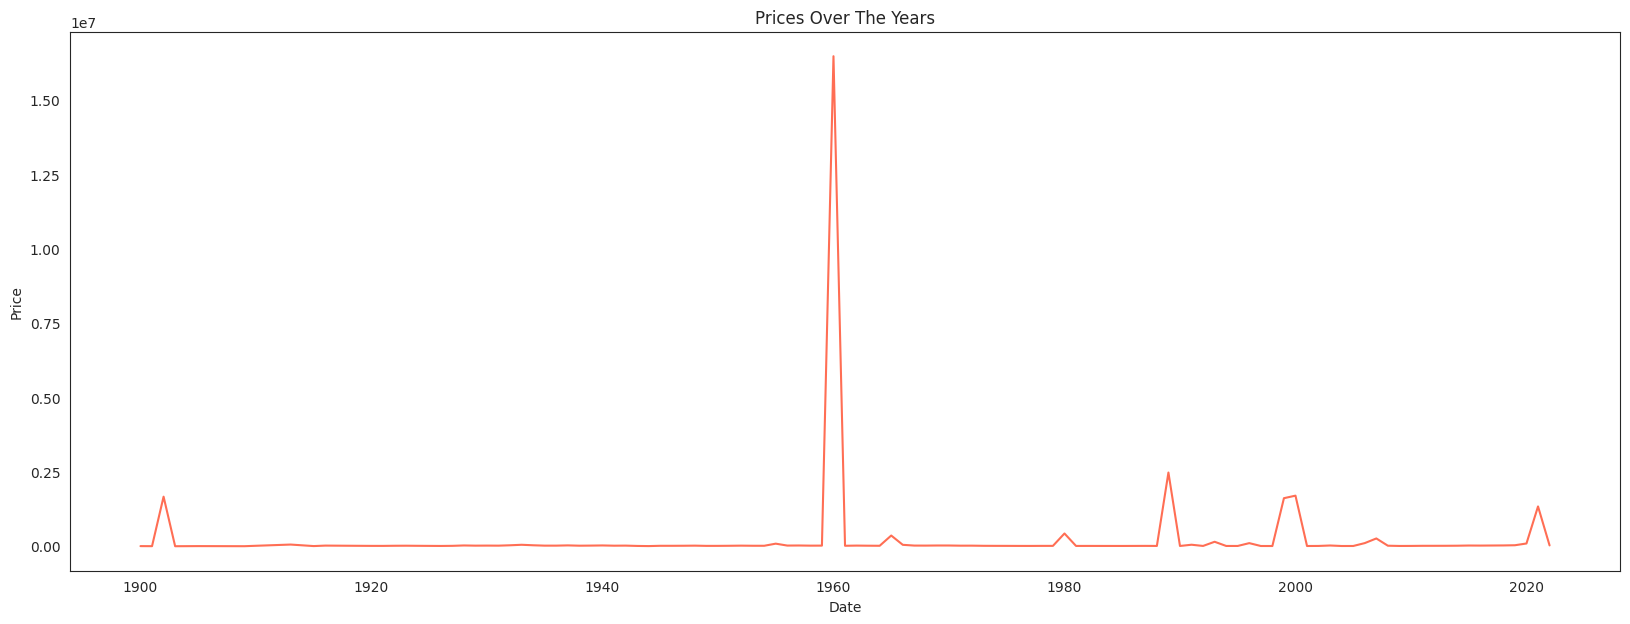

In [138]:
plt.figure(figsize=[20,7])
sns.lineplot(data=df, x='year', y='price', ci=None)
plt.title('Prices Over The Years')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

The prices of vehicles have been fluctuating over the years with a sharp increase in the year 2000. This could be due to various reasons such as inflation, market demand, etc.

## Model Development

### Data Preprocessing

In [139]:
# check dataset
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,4500.0,2002,bmw,good,6 cylinders,gas,184000.0,clean,automatic,4wd,full-size,sedan,white,tx,32.401556,-99.884713
1,4500.0,2002,bmw,good,6 cylinders,gas,184000.0,clean,automatic,4wd,full-size,sedan,white,tx,32.401556,-99.884713
2,4900.0,2006,toyota,excellent,4 cylinders,gas,184930.0,clean,automatic,fwd,full-size,sedan,silver,tx,32.453848,-99.787900
3,6500.0,2008,ford,good,6 cylinders,gas,206000.0,clean,automatic,4wd,full-size,sedan,white,tx,32.401556,-99.884713
4,6500.0,2008,ford,good,6 cylinders,gas,206000.0,clean,automatic,4wd,full-size,sedan,white,tx,32.401556,-99.884713


In [140]:
# checking non numerical features
for col in df.select_dtypes(exclude=np.number).columns:
    print(col, df[col].value_counts(), '*' * 50, sep='\n\n')
    print()

manufacturer

ford               88631
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-marti

In [141]:
# checking numerical features
for col in df.select_dtypes(include=np.number).columns:
    print(col, df[col].value_counts(), '*' * 50, sep='\n\n')
    print()

price

0.0          32895
6995.0        3169
7995.0        3129
9995.0        2867
8995.0        2837
             ...  
13191.0          1
3226714.0        1
15053.0          1
13883.0          1
53480.0          1
Name: price, Length: 15655, dtype: int64

**************************************************

year

2017    36420
2018    36369
2015    31538
2013    30794
2016    30434
        ...  
1905        1
1909        1
1918        1
1902        1
1943        1
Name: year, Length: 114, dtype: int64

**************************************************

odometer

98043.331443     4400
100000.000000    2263
1.000000         2246
0.000000         1965
200000.000000    1728
                 ... 
57508.000000        1
275079.000000       1
54995.000000        1
195626.000000       1
177886.000000       1
Name: odometer, Length: 104871, dtype: int64

**************************************************

lat

38.493940    6549
33.779214    3301
43.182400    2666
40.468785    2346
33.786500   

In [144]:
# features
selected_features = ['year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer',
                     'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state', 'lat', 'long']

# target feature (to be predicted)
target_feature = 'price'

# ordinal features
ordinal_features = ['condition', 'transmission', 'size', 'title_status', 'cylinders']

ordinal_features_order_condition = ['salvage', 'fair', 'good', 'like new', 'excellent', 'new']
ordinal_features_order_transmission = ['manual', 'automatic', 'other']
ordinal_features_order_size = ['sub-compact', 'compact', 'mid-size', 'full-size']
ordinal_features_order_title_status = ['parts only', 'missing', 'salvage', 'lien', 'rebuilt', 'clean']
ordinal_features_order_cylinders = ['3 cylinders', '4 cylinders', '5 cylinders', '6 cylinders', '8 cylinders', '10 cylinders', '12 cylinders', 'other']

# numerical/continuous features
numerical_features = ['year', 'odometer', 'lat', 'long']

**Encoding ordinal features & Scaling Numerical features**

In [145]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

def preprocess_data(df):
    # Ordinal encoding for ordinal features
    encoder_condition = OrdinalEncoder(categories=[ordinal_features_order_condition], dtype=int)
    encoder_transmission = OrdinalEncoder(categories=[ordinal_features_order_transmission], dtype=int)
    encoder_size = OrdinalEncoder(categories=[ordinal_features_order_size], dtype=int)
    encoder_title_status = OrdinalEncoder(categories=[ordinal_features_order_title_status], dtype=int)
    encoder_cylinders = OrdinalEncoder(categories=[ordinal_features_order_cylinders], dtype=int)

    df['condition'] = encoder_condition.fit_transform(df[['condition']])
    df['transmission'] = encoder_transmission.fit_transform(df[['transmission']])
    df['size'] = encoder_size.fit_transform(df[['size']])
    df['title_status'] = encoder_title_status.fit_transform(df[['title_status']])
    df['cylinders'] = encoder_cylinders.fit_transform(df[['cylinders']])

    # Scaling for continuous features
    scaler = StandardScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])

    return df

In [146]:
df_processed = preprocess_data(df[selected_features])

In [147]:
# checking the dataset again
df_processed.head()

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,-0.978362,bmw,2,3,gas,0.403977,5,1,4wd,3,sedan,white,tx,-1.051037,-0.281832
1,-0.978362,bmw,2,3,gas,0.403977,5,1,4wd,3,sedan,white,tx,-1.051037,-0.281832
2,-0.554577,toyota,4,1,gas,0.408348,5,1,fwd,3,sedan,silver,tx,-1.042016,-0.276520
3,-0.342685,ford,2,3,gas,0.507372,5,1,4wd,3,sedan,white,tx,-1.051037,-0.281832
4,-0.342685,ford,2,3,gas,0.507372,5,1,4wd,3,sedan,white,tx,-1.051037,-0.281832


In [148]:
# set object columns to categorical because of xgboost
df_processed[df_processed.select_dtypes(exclude=np.number).columns] = df_processed[df_processed.select_dtypes(exclude=np.number).columns].apply(lambda x: x.astype('category'))

In [149]:
df_processed.dtypes

year             float64
manufacturer    category
condition          int64
cylinders          int64
fuel            category
odometer         float64
title_status       int64
transmission       int64
drive           category
size               int64
type            category
paint_color     category
state           category
lat              float64
long             float64
dtype: object

### Model Training

In [155]:
import xgboost as xgb
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, max_error
from hyperopt import fmin, tpe, hp, STATUS_OK
import random

In [156]:
X = df_processed
y = df[target_feature]

print(X.shape, y.shape)

(426880, 15) (426880,)


In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(341504, 15) (341504,)
(85376, 15) (85376,)


####  Hyperparameter Tuning Using the Objective Function for Bayesian Optimization

In [160]:
# Define the search space for Hyperopt
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 1050, 50),  # Wide range for exploration
    'max_depth': hp.choice('max_depth', range(1, 10)),  # Flexibility in tree depth
    'learning_rate': hp.loguniform('learning_rate', 0.001, 0.3),  # Fine-tune update speed
    'subsample': hp.uniform('subsample', 0.1, 1),  # Control feature randomness
    'colsample_bytree': hp.uniform('colsample_bytree', 0.1, 1),  # Randomness in tree building
    'gamma': hp.uniform('gamma', 0, 5),  # Adjust tree splits
    'min_child_weight': hp.uniform('min_child_weight', 1, 10),  # Handle imbalanced data
    'reg_lambda': hp.uniform('reg_lambda', 0.1, 10),  # Prevent overfitting
}

In [ ]:
# Objective function with early stopping
def objective(params):
    params.update({key: int(value) if key in ('n_estimators', 'max_depth', 'min_child_weight') else value for key, value in params.items()})
    kf = KFold(n_splits=10, shuffle=True, random_state=101)

    xgb_model = xgb.XGBRegressor(**params, random_state=101, eval_metric='rmse', early_stopping_rounds=100, enable_categorical=True)

    scores = []
    for train_index, test_index in kf.split(X_train, y_train):
        xgb_model.fit(X_train.iloc[train_index], y_train.iloc[train_index], eval_set=[(X_train.iloc[test_index], y_train.iloc[test_index])], verbose=False)
        y_pred = xgb_model.predict(X_train.iloc[test_index])
        scores.append(mean_squared_error(y_train.iloc[test_index], y_pred, squared=False))

    mean_scores = np.mean(scores)
    loss = mean_scores  # For regression, the lower the better

    return {'loss': loss, 'status': STATUS_OK, 'params': params}

# Hyperparameter optimization
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100)

# Extract the best parameters
best_params = {key: int(value) if key in ('n_estimators', 'max_depth', 'min_child_weight') else value
               for key, value in best.items() if key not in ('loss', 'status')}
print("\nBest Parameters:", best_params)

In [ ]:
xgb_model = xgb.XGBRegressor(random_state=101, eval_metric='rmse', early_stopping_rounds=100, enable_categorical=True)

# Initialize lists for regression metrics
regression_metrics_train, regression_metrics_val = [], []

kf = KFold(n_splits=10, shuffle=True, random_state=101)

for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    X_train_sub, X_val_sub = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_sub, y_val_sub = y_train.iloc[train_index], y_train.iloc[val_index]

    xgb_model.fit(X_train_sub, y_train_sub, eval_set=[(X_val_sub, y_val_sub)], verbose=False)
    train_pred = xgb_model.predict(X_train_sub)  # Train set
    y_pred = xgb_model.predict(X_val_sub)        # Validation set

    # Regression metric calculations
    train_metrics = (
        mean_squared_error(y_train_sub, train_pred),
        mean_absolute_error(y_train_sub, train_pred),
        r2_score(y_train_sub, train_pred),
        explained_variance_score(y_train_sub, train_pred),
        max_error(y_train_sub, train_pred)
    )

    val_metrics = (
        mean_squared_error(y_val_sub, y_pred),
        mean_absolute_error(y_val_sub, y_pred),
        r2_score(y_val_sub, y_pred),
        explained_variance_score(y_val_sub, y_pred),
        max_error(y_val_sub, y_pred)
    )

    # Append metrics to lists
    regression_metrics_train.append(train_metrics)
    regression_metrics_val.append(val_metrics)

# Calculate means of metrics for Training set
mean_regression_metrics_train = np.mean(regression_metrics_train, axis=0)

# Calculate means of metrics for Validation set
mean_regression_metrics_val = np.mean(regression_metrics_val, axis=0)

# Display evaluation metrics for Training set
print("\nTraining Set Metrics:")
print("Mean MSE Train:", mean_regression_metrics_train[0])
print("Mean MAE Train:", mean_regression_metrics_train[1])
print("Mean R-squared Train:", mean_regression_metrics_train[2])
print("Mean Explained Variance Train:", mean_regression_metrics_train[3])
print("Mean Max Error Train:", mean_regression_metrics_train[4])

# Display evaluation metrics for Validation set
print("\nValidation Set Metrics:")
print("Mean MSE Val:", mean_regression_metrics_val[0])
print("Mean MAE Val:", mean_regression_metrics_val[1])
print("Mean R-squared Val:", mean_regression_metrics_val[2])
print("Mean Explained Variance Val:", mean_regression_metrics_val[3])
print("Mean Max Error Val:", mean_regression_metrics_val[4])

####  Selecting Parameters Straight Away

In [217]:
params = {
                'n_estimators': 200,
                'learning_rate': 0.03,
                'max_depth': 5,
                'subsample': 0.8,
                'colsample_bytree': 0.8,
                'gamma': 0.6,
                'min_child_weight': 0,
                'reg_alpha': 0.1,
                'reg_lambda': 0.1,
                'objective': 'reg:squarederror',
                'eval_metric': 'rmse',
                'seed': 101,
                'early_stopping_rounds': 200
}

In [218]:
xgb_model = xgb.XGBRegressor(**params, enable_categorical=True)
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=200,
             enable_categorical=True, eval_metric='rmse', feature_types=None,
             gamma=0.6, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=0, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [219]:
# Evaluate the model on test subset
y_pred = xgb_model.predict(X_test)

# Regression
regression_metrics = (
    mean_squared_error(y_test, y_pred),
    mean_absolute_error(y_test, y_pred),
    np.sqrt(mean_squared_error(y_test, y_pred)),
    r2_score(y_test, y_pred),
    explained_variance_score(y_test, y_pred),
    max_error(y_test, y_pred)
)

# Display regression metrics
print('\nRegression Metrics:')
print('Mean Squared Error:', regression_metrics[0])
print('Mean Absolute Error:', regression_metrics[1])
print('Root Mean Squared Error:', regression_metrics[2])
print('R-squared:', regression_metrics[3])
print('Explained Variance:', regression_metrics[4])
print('Max Error:', regression_metrics[5])


Regression Metrics:
Mean Squared Error: 13804465623.622608
Mean Absolute Error: 71512.49594642376
Root Mean Squared Error: 117492.40666367597
R-squared: -1.496247421674509
Explained Variance: -0.5976790751984311
Max Error: 16912815.6640625
